# Probabilities of Scores

**January 15, 2023**

## Introduction

Data analysis has become an increasingly important tool in the world of football, as teams and analysts strive to gain a competitive edge by uncovering insights from the vast amounts of data that are generated during games and throughout the season. One important aspect of data analysis in football is the analysis of goals, which is a fundamental measure of a team's performance and an essential statistic for understanding how and why teams win or lose.

Another area of focus in football data analysis is the classification of players and teams. This can include identifying key attributes and characteristics that distinguish successful teams and players from those that struggle, such as ball possession, passing accuracy, and defensive positioning. Additionally, analysts can use machine learning techniques to classify players into different positions or roles, such as midfielders, forwards and defenders, and these classifications can be useful in scouting, trade and recruitment of players.

Another area of interest is in the analysis of assists, which is an indicator of a player's ability to create scoring opportunities for their teammates. With the ability to track the movement of the ball and players on the field, analysts can now gain a deeper understanding of how assists are created and which players are most effective at setting up goals. These insights can be used to inform tactics, identify areas of improvement and discover hidden patterns in how teams are playing.

Overall, data analysis in football is a powerful tool that can help teams and analysts to gain a better understanding of the game, improve performance and make more informed decisions. With the abundance of data that is available and the increasing availability of advanced analytical techniques, the opportunities for data analysis in football are almost limitless.

In this case, the Kings League, although it is based on the rules of _Fútbol 7_, has other external elements that can make the results even more variable. Still, I am curious to analyze such data and create a predictive model.

Using the BeautifulSoup library we are going to load different data from the [kingsleague.pro](https://kingsleague.pro/) website. Among other data we read the classification data of the 12 teams, schedule of matches between teams and assists per player and team.

In [22]:
import pandas as pd
import numpy as npy
from scipy.stats import poisson
from scipy.special import factorial

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

This function is called "cleandata" and it takes in two arguments:

_x_: a string variable that represents the data that needs to be cleaned.  
_S_: a list of strings that are used to replace the characters in _x_.
The purpose of this function is to clean up a string of data by removing or replacing certain characters or sub-strings.

Here's how the function works:

  * The function starts a for loop that iterates through the items in the list _S_.
  * For each item s in the list _S_, the function replaces all occurrences of s in x with an empty string using the _.replace()_ method.
  * The .replace() method replaces all occurrences of a substring with another substring. If the second argument is empty string that means it remove the first argument substring
  * This process is repeated for each item in the list _S_.
  * Finally, the function returns the cleaned version of _x_ as the output.

It's important to note that this function will only remove the exact characters and sub-strings specified in the list S, and it does not do any other kind of data cleaning or validation. This function can be useful for specific data-scraping use case or to clean up the data before further processing.

In [23]:
def cleandata(x, S = ["\t", "\n", "V:", "D:", "GF:", "GC:", "TA:", "TR:", "Pos.:", "Equip."]):
    """
    Cleans a string by removing specified substrings.
    
    Parameters:
    x (str): The string to be cleaned.
    S (list[str]): A list of substrings to be removed from the string. Default is a list of common substrings in football data such as "\t", "\n", "V:", "D:", "GF:", "GC:", "TA:", "TR:", "Pos.:", "Equip."
    
    Returns:
    str : the cleaned string
    
    Example:
    >> x = "\tTeam A\nV: 12\nD: 3\nGF: 45\nGC: 20\nTA: 65\nTR: +25\nPos.: 1\nEquip.:\t Manchester United"
    >> cleandata(x)
    "Team A 12 3 45 20 65 +25 1 Manchester United"
    
    """    
    for s in S:
        x = x.replace(s,"")
    return x

def probabilitycross(team1, team2, probabilities):
    """
    Compute the cross-probabilities of a team1 and team2 scoring different number of goals.

    Parameters:
    team1 (str): The name of the first team
    team2 (str): The name of the second team
    probabilities (pd.DataFrame): Dataframe containing the scoring probabilities for the teams

    Returns:
    pd.DataFrame : A dataframe of size 6x6 with the cross-probabilities of team1 and team2 scoring i and j goals respectively
    
    Example:

    """
    resultado = []
    for i_ in range(6):
        resultado.append([probabilities.loc[team1, i_]*x for x in probabilities.loc[team2]])    
    return pd.DataFrame(resultado)


def plotprobabilitycross(team1, team2, probabilities, ax):
    """
    Plot the cross-probabilities of a team1 and team2 scoring different number of goals on a heatmap.

    Parameters:
    team1 (str): The name of the first team
    team2 (str): The name of the second team
    probabilities (pd.DataFrame): Dataframe containing the scoring probabilities for the teams
    ax (matplotlib.axes._subplots.AxesSubplot): A matplotlib axes object on which to plot the heatmap

    Returns:
    None

    Example:
    """
    sns.heatmap(probabilitycross(team1, team2, probabilities), 
                annot = True, annot_kws = {"size": 10}, ax = ax, 
                fmt = ".1%", linewidths = 0.5, cmap = 'Spectral')
    ax.set_xlabel(team2, fontsize = 12)
    ax.set_ylabel(team1, fontsize = 12)
    ax.set_title(team1 + ' vs. ' + team2, fontsize = 12, loc = 'left', color = '0.4', fontweight = 'bold')


## Classification

In football, a league is a competition in which teams play against each other on a regular basis. The teams are usually divided into different divisions or groups, and the teams in each division compete against each other. A classification is the ranking of teams within a league or division based on their performance. This is typically determined by the number of wins, losses, and draws a team has, and sometimes by other factors such as goal difference. The team with the most points at the end of the season is typically considered the champion of the league or division.

In the **Kings League** there is no possibility of a draw, one team wins and the other loses.

In [24]:
url = 'https://kingsleague.pro/estadisticas/clasificacion/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:108.0) Gecko/20100101 Firefox/108.0',
          'referer': url}

r = requests.get(url, 
                 headers = headers,)
soup = BeautifulSoup(r.text)

data = []

for table in soup.find_all('table'):
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [cleandata(ele.text.strip()) for ele in cols]
        data.append([ele for ele in cols if ele]) 

In [25]:
classification = \
pd.DataFrame(data, columns = ['Posición', 'Equipo', 'V', 'D', 'GF', 'GC', 'TA', 'TR'])
classification = classification.set_index('Equipo')
classification

,Posición,V,D,GF,GC,TA,TR
Equipo,,,,,,,
Ultimate Móstoles,1,2,0,8,3,1,0
1K FC,2,2,0,7,4,0,0
Saiyans FC,3,2,0,5,3,3,0
Kunisports,4,2,0,3,1,1,0
El Barrio,5,1,1,7,3,1,0
Los Troncos FC,6,1,1,8,8,1,0
Porcinos FC,7,1,1,7,7,1,0
Rayo de Barcelona,8,1,1,7,7,0,0
Jijantes FC,9,0,2,4,7,2,0


## Model Dixon-Coles

The Dixon-Coles model is a statistical model used to predict the outcome of football (soccer) matches. It was developed by statisticians Dr. Mark Dixon and Dr. Stuart Coles in the late 1990s and is widely used by football analysts, bookmakers and sports organizations to forecast match results and generate odds.

The model is based on the Poisson distribution, a probability distribution commonly used in statistical modeling of count data, such as the number of goals scored in a football match. The Dixon-Coles model takes into account a variety of factors that are thought to influence the outcome of a match, such as the team's offensive and defensive strengths, home-field advantage, and the importance of the match.

The model estimates the number of goals that each team will score in a match, and the probabilities of the three possible outcomes (home win, draw, and away win) are calculated from these estimates. It also allows for the incorporation of time-varying parameters such as form, injuries and suspensions.

One of the strengths of the Dixon-Coles model is that it can be easily customized to incorporate additional factors that are thought to influence the outcome of a match, such as the playing style of the teams or the influence of a specific player or coach.

The Dixon-Coles model is widely used to predict the outcomes of football matches and is often seen as an important tool for football analysts and bookmakers, as it provides valuable insights into the relative strengths of teams and helps to identify opportunities for profitable betting.

## Probabilities

In a football league, a schedule refers to the list of games that teams will play during the course of a season. The schedule typically includes the date, time, and location of each game, as well as the teams that will be playing. The schedule is often released before the start of the season and is used to plan and organize the games.

The Poisson distribution is a probability distribution that describes the number of rare events (such as the number of goals scored in a football match) that occur in a fixed interval of time or space. It is typically used to model count data, where the events are rare, independent, and occur at a constant average rate.

The Poisson distribution is defined by a single parameter $\lambda$, which represents the average number of events that occur in a given interval of time or space. The probability of observing k events in a given interval is given by the probability mass function:

$$ P(k, \lambda) = \dfrac{\lambda^k \cdot \exp^{-\lambda}}{k!}$$

Where e is Euler's number and $k!$ is the factorial of $k$.

A key property of the Poisson distribution is that the mean and variance are equal to the parameter $\lambda$, and the distribution is only defined for non-negative integers. This means that the Poisson distribution can only model the count of discrete events and not the continuous variables such as time or space.

The Poisson distribution is widely used in many fields such as queueing theory, telecommunications, and event-based systems, as it allows for the modeling of rare events, which makes it suitable for a wide range of applications, from counting the number of goals in a football match to analyzing the number of customers arriving at a retail store.

In [26]:
url = 'https://kingsleague.pro/calendario/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:108.0) Gecko/20100101 Firefox/108.0',
          'referer': url}

r = requests.get(url, headers = headers,)
soup = BeautifulSoup(r.text)

In [27]:
data = []
for table in soup.find_all('table'):
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [cleandata(ele.text.strip()) for ele in cols]
        data.append([ele for ele in cols if ele])
        
data = pd.DataFrame(data)
data = data.loc[data[2] != "vs", :]
data['GL'] = [cleandata(x[0], ["(" + str(x) + ")" for x in range(10)]) for x in data[5].str.split("–")]
data['GV'] = [cleandata(x[1], ["(" + str(x) + ")" for x in range(10)]) for x in data[5].str.split("–")]
data

data = \
pd.concat([
    pd.DataFrame({'Equipo': data[0], 'Siglas': data[1], 'Goles': data['GL']}),
    pd.DataFrame({'Equipo': data[4], 'Siglas': data[3], 'Goles': data['GV']})]).sort_values(by = 'Equipo')
data.Goles = pd.to_numeric(data.Goles)

This table shows the average number of goals (using the median as the central estimate) for each team in the Kings League. We will use this central estimate to derive the Poisson distribution of expected goals per game.

The table is ordered from lowest to highest number of expected goals. We will use this value as $\lambda$ value.

In [28]:
data.groupby(['Equipo', 'Siglas', ])\
    .mean()\
    .sort_values(by = 'Goles')\
    .rename(columns = {'Goles': '$\lambda$'})

,,$\lambda$
Equipo,Siglas,
PIO FC,PIO,0.333333
Aniquiladores FC,ANI,1.000000
Kunisports,KNS,1.000000
XBUYER TEAM,XBU,1.000000
Jijantes FC,JFC,1.333333
Saiyans FC,SAI,1.666667
1K FC,1K,2.333333
El Barrio,ELB,2.333333
Porcinos FC,POR,2.333333


In [29]:
index_lambdas_ = \
data.groupby(['Equipo', 'Siglas', ])\
    .mean()\
    .sort_values(by = 'Goles')\
    .index
lambdas_ = \
data.groupby(['Equipo', 'Siglas', ])\
    .mean()\
    .sort_values(by = 'Goles')\
    .Goles\
    .values

In [30]:
probabilidades = []
for lambda_ in lambdas_:
    probabilidades.append([poisson.pmf(x, lambda_) for x in [0,1,2,3,4,5]])

probabilidades = \
pd.DataFrame(probabilidades, 
             index = index_lambdas_)

probabilidades = \
probabilidades.reset_index().drop(columns = ['Siglas']).set_index('Equipo')
                                  
probabilidades

,0,1,2,3,4,5
Equipo,,,,,,
PIO FC,0.716531,0.238844,0.039807,0.004423,0.000369,0.000025
Aniquiladores FC,0.367879,0.367879,0.183940,0.061313,0.015328,0.003066
Kunisports,0.367879,0.367879,0.183940,0.061313,0.015328,0.003066
XBUYER TEAM,0.367879,0.367879,0.183940,0.061313,0.015328,0.003066
Jijantes FC,0.263597,0.351463,0.234309,0.104137,0.034712,0.009257
Saiyans FC,0.188876,0.314793,0.262327,0.145737,0.060724,0.020241
1K FC,0.096972,0.226268,0.263979,0.205317,0.119768,0.055892
El Barrio,0.096972,0.226268,0.263979,0.205317,0.119768,0.055892
Porcinos FC,0.096972,0.226268,0.263979,0.205317,0.119768,0.055892


In [31]:
probabilidades\
    .style\
    .format(precision = 3)\
    .background_gradient(vmin = 0, vmax = 1, cmap = 'Spectral')

,0,1,2,3,4,5
Equipo,,,,,,
PIO FC,0.717,0.239,0.040,0.004,0.000,0.000
Aniquiladores FC,0.368,0.368,0.184,0.061,0.015,0.003
Kunisports,0.368,0.368,0.184,0.061,0.015,0.003
XBUYER TEAM,0.368,0.368,0.184,0.061,0.015,0.003
Jijantes FC,0.264,0.351,0.234,0.104,0.035,0.009
Saiyans FC,0.189,0.315,0.262,0.146,0.061,0.020
1K FC,0.097,0.226,0.264,0.205,0.120,0.056
El Barrio,0.097,0.226,0.264,0.205,0.120,0.056
Porcinos FC,0.097,0.226,0.264,0.205,0.120,0.056


In [32]:
probabilitycross(team1 = 'PIO FC', team2 = 'Ultimate Móstoles', probabilities = probabilidades)

,0,1,2,3,4,5
0,0.049787,0.132766,0.177021,0.157352,0.104901,0.055947
1,0.016596,0.044255,0.059007,0.052451,0.034967,0.018649
2,0.002766,0.007376,0.009834,0.008742,0.005828,0.003108
3,0.000307,0.000820,0.001093,0.000971,0.000648,0.000345
4,0.000026,0.000068,0.000091,0.000081,0.000054,0.000029
5,0.000002,0.000005,0.000006,0.000005,0.000004,0.000002


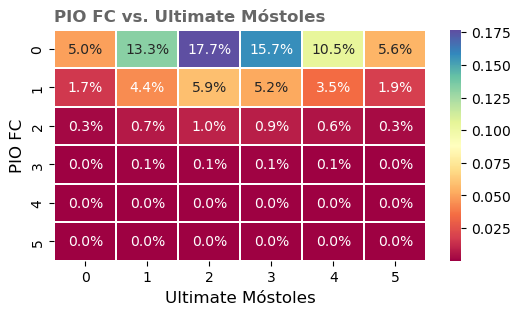

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,3,))
plotprobabilitycross(team1 = 'PIO FC', 
                     team2 = 'Ultimate Móstoles', 
                     probabilities = probabilidades,
                     ax = ax)

In [34]:
data = []
for table in soup.find_all('table'):
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [cleandata(ele.text.strip()) for ele in cols]
        data.append([ele for ele in cols if ele])
        
data = pd.DataFrame(data)
matchday = 2
i_start = [0, 6, 12, 18, 24][matchday]
i_end = i_start + 5
match = \
    data.loc[i_start:i_end,:]
match

,0,1,2,3,4,5
12,Jijantes FC,JFC,16:00,1K,1K FC,0 – 0
13,Rayo de Barcelona,RDB,17:00,XBU,XBUYER TEAM,0 – 0
14,Saiyans FC,SAI,18:00,ULT,Ultimate Móstoles,0 – 0
15,Kunisports,KNS,19:00,POR,Porcinos FC,0 – 0
16,Los Troncos FC,TFC,20:00,PIO,PIO FC,0 – 0
17,El Barrio,ELB,21:00,ANI,Aniquiladores FC,0 – 0


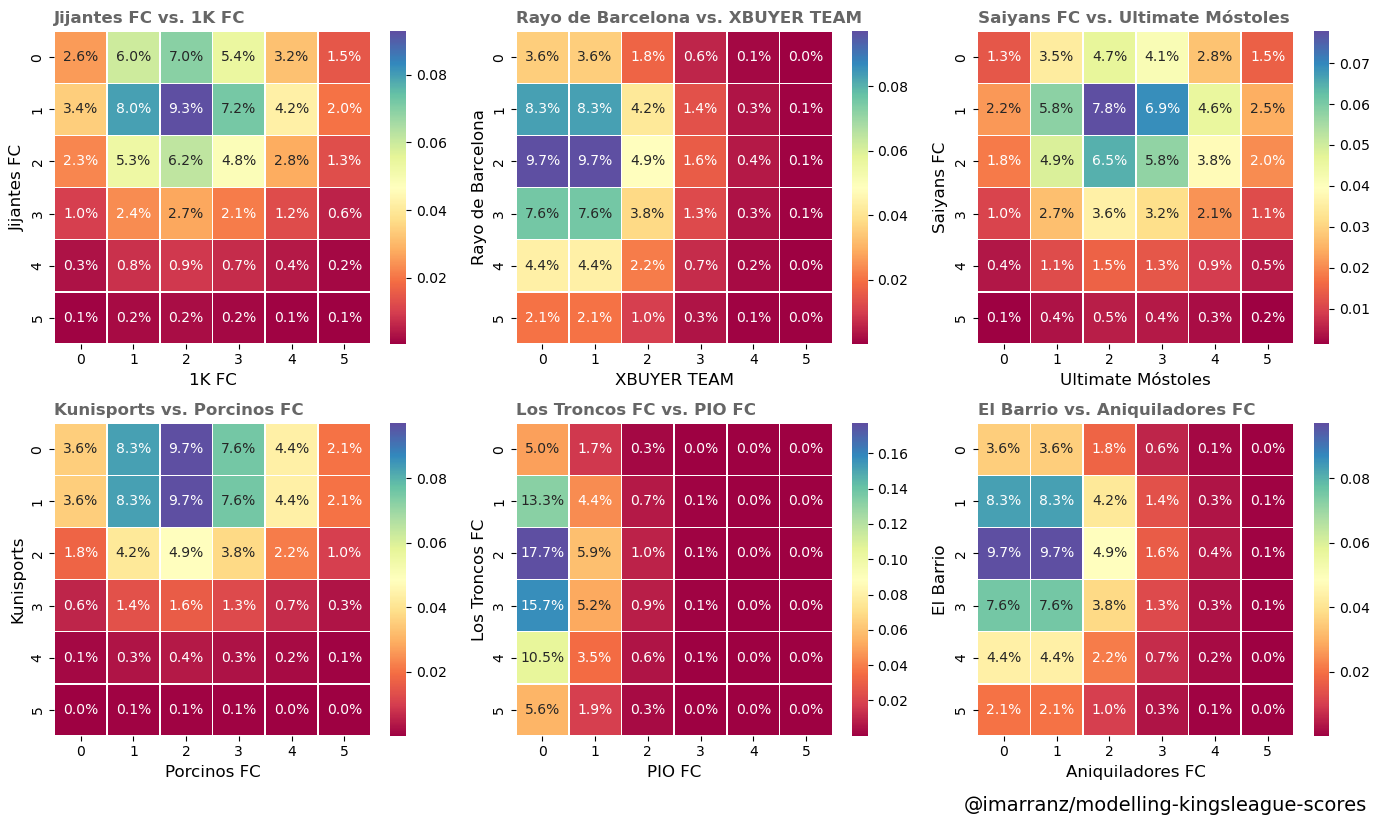

In [37]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8))

opciones = []

for i, ax in zip(range(match.shape[0]), axes.flat):
    team1 = match.iloc[i,0]
    team2 = match.iloc[i,4]
    plotprobabilitycross(team1 = team1, team2 = team2, probabilities = probabilidades, ax = ax)
    pc = probabilitycross(team1 = team1, team2 = team2, probabilities = probabilidades)   
    pteam1 = npy.sum(npy.tril(pc))
    pteam2 = npy.sum(npy.triu(pc))
    d = (pteam1 + pteam2 - 1)
    m = (pteam1 - d) + (pteam2 - d)
    opciones.append([team1, team2, (pteam1 - d)/m, (pteam2 - d)/m])

plt.gcf().text(0.98, -0.02, '@imarranz/modelling-kingsleague-scores', fontsize = 14, ha = 'right')
fig.tight_layout()

In [15]:
pd.DataFrame(opciones)

,0,1,2,3
0,Jijantes FC,1K FC,0.286686,0.713314
1,Rayo de Barcelona,XBUYER TEAM,0.790126,0.209874
2,Saiyans FC,Ultimate Móstoles,0.322141,0.677859
3,Kunisports,Porcinos FC,0.209874,0.790126
4,Los Troncos FC,PIO FC,0.912202,0.087798
5,El Barrio,Aniquiladores FC,0.790126,0.209874


In [16]:
team_colors = {'1K FC': '#6f68f4',
 'El Barrio': '#49b2ad',
 'Ultimate Móstoles': '#7b7b7b',
 'Los Troncos FC': '#31585a',
 'Saiyans FC': '#1932e0',
 'Kunisports': '#101920',
 'Jijantes FC': '#d4293d',
 'Porcinos FC': '#d91f5d',
 'Rayo de Barcelona': '#f6ab34',
 'XBUYER TEAM': '#979797',
 'Aniquiladores FC': '#ea4163',
 'PIO FC': '#fff68d'}

Text(0.98, 0.02, '@imarranz/modelling-kingsleague-scores')

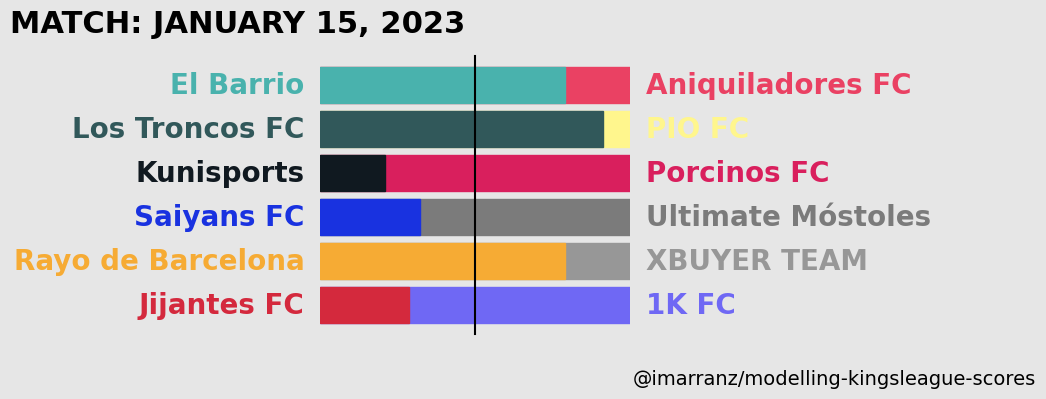

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, 
                                    ncols = 3, 
                                    figsize = (12, 4), 
                                    facecolor = '0.9')

for ax in [ax1,ax2,ax3]:
    ax.axis('off')
    ax.set_xlim(0,1)
    ax.set_ylim(0,7)

for match, team1, team2, probability in zip(range(6), 
                                            pd.DataFrame(opciones)[0], 
                                            pd.DataFrame(opciones)[1],
                                            pd.DataFrame(opciones)[2],):

    ax1.text(x = 0.95, 
             y = match + 0.8, 
             s = team1, 
             color = team_colors[team1],   
             fontweight = "bold",
             ha = 'right', 
             fontsize = 20)
    
    ax2.add_patch(Rectangle(xy = (0.0, match + 1 - 0.4), 
                            width = 1.00, 
                            height = 0.8,
                            color = team_colors[team2]))    
    
    ax2.add_patch(Rectangle(xy = (0.0, match + 1 - 0.4), 
                            width = probability, 
                            height = 0.8,
                            color = team_colors[team1]))    

    ax3.text(x = 0.05, 
             y = match + 0.8, 
             s = team2,
             color = team_colors[team2],
             fontweight = "bold",
             ha = 'left', 
             fontsize = 20)

ax2.axvline(x = 0.5, ymin = 0.05, ymax = 0.95, color = 'black')
ax1.set_title('match: January 15, 2023'.upper(), loc = 'left', fontweight = 'bold', fontsize = 22)
fig.subplots_adjust(wspace = 0.00)
plt.gcf().text(0.98, 0.02, '@imarranz/modelling-kingsleague-scores', fontsize = 14, ha = 'right')